## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
pd.options.mode.chained_assignment = None 

%matplotlib inline

## Reading Dataset

In [2]:
housing = pd.read_csv("California.csv")
housing.head()
housing.shape

(20640, 10)

### Exploring Data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Data Visualising

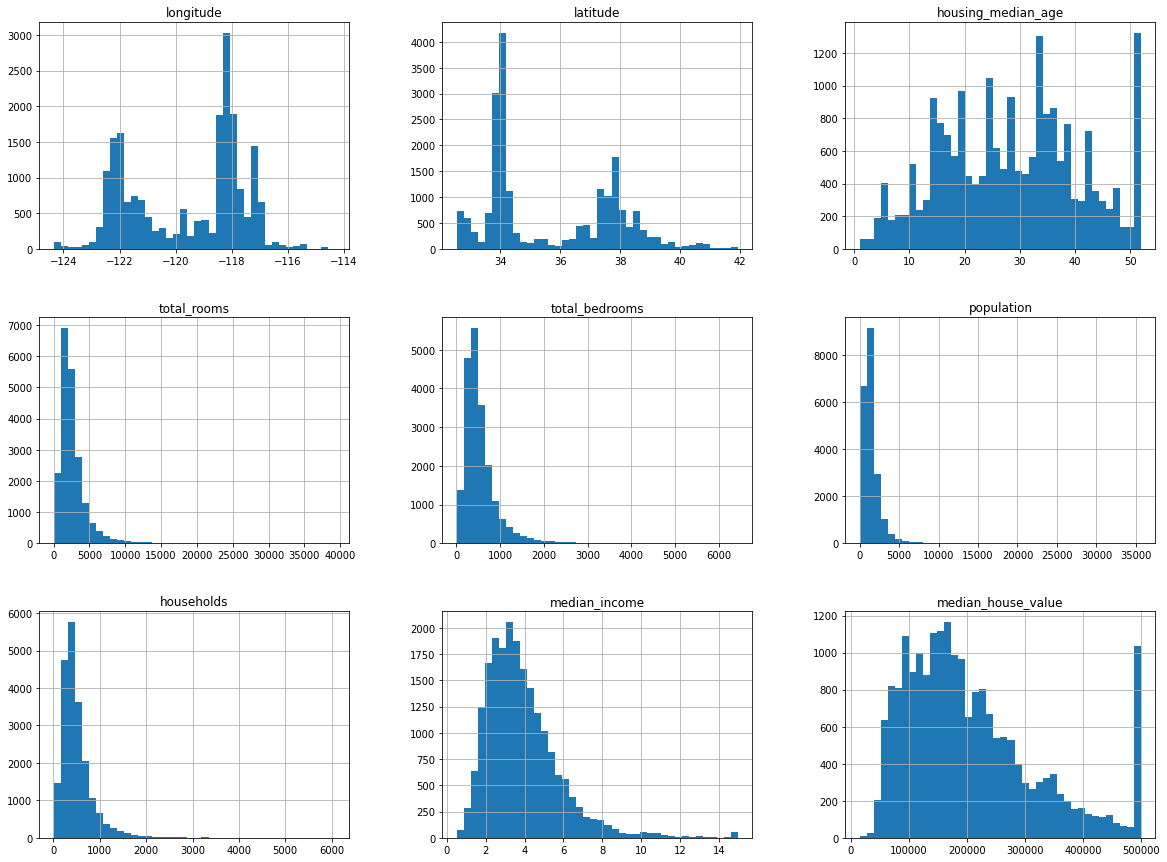

In [6]:
housing.hist(bins=40,figsize=(20,15),);

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

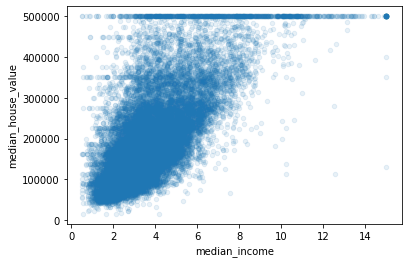

In [7]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


## Data Clening

In [8]:
housing = housing.dropna() 
housing.info()
housing.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Handling Catogarical values

In [9]:
enc = OneHotEncoder(sparse=False)

housing_cat = enc.fit_transform(housing[["ocean_proximity"]])

encoded_df = pd.DataFrame(housing_cat,columns=list(enc.categories_[0]))
encoded_df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20428,0.0,1.0,0.0,0.0,0.0
20429,0.0,1.0,0.0,0.0,0.0
20430,0.0,1.0,0.0,0.0,0.0
20431,0.0,1.0,0.0,0.0,0.0


## Feature Scaling the numaric columns

In [10]:
housing_num = housing.drop(['ocean_proximity','median_house_value'],axis=1)
housing_label = housing['median_house_value']

# housing_label.head
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

arr = scalar.fit_transform(housing_num)

In [12]:
# truning this arra into the df

scaled_df = pd.DataFrame(arr,columns=housing_num.columns)
scaled_df.info()
scaled_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143


### Joining the encoded df with full df

In [13]:
full_df = scaled_df.join(encoded_df) 

In [14]:
# full_df.drop(['ocean_proximity'],axis=1,inplace=True)

#### Droping the first column of encoded df

In [15]:
full_df.drop(['<1H OCEAN'],axis=1,inplace=True)

In [16]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   INLAND              20433 non-null  float64
 9   ISLAND              20433 non-null  float64
 10  NEAR BAY            20433 non-null  float64
 11  NEAR OCEAN          20433 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [17]:
full_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.0,0.0,1.0,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.0,0.0,1.0,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0.0,0.0,1.0,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.0,0.0,1.0,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.0,0.0,1.0,0.0


### Rechecking for null values

In [18]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   INLAND              20433 non-null  float64
 9   ISLAND              20433 non-null  float64
 10  NEAR BAY            20433 non-null  float64
 11  NEAR OCEAN          20433 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [19]:
full_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [20]:
full_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0.0,0.0,1.0,0.0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0.0,0.0,1.0,0.0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0.0,0.0,1.0,0.0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0.0,0.0,1.0,0.0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0.0,0.0,1.0,0.0


### Spliting dataset

In [21]:
X = full_df
y = housing['median_house_value']

print("X shape : {0}".format(X.shape))
print("y traget shape : {0}".format(y.shape))


X shape : (20433, 12)
y traget shape : (20433,)


In [22]:
# Spliting 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print("X_train shape : {0}".format(X_train.shape))
print("X_test shape : {0}".format(X_test.shape))
print("y_train shape : {0}".format(y_train.shape))
print("y_test shape : {0}".format(y_test.shape))

X_train shape : (16346, 12)
X_test shape : (4087, 12)
y_train shape : (16346,)
y_test shape : (4087,)


# Mechine learning

In [24]:
from sklearn.linear_model import LinearRegression

lir = LinearRegression()

lir.fit(X_train,y_train)

LinearRegression()

In [25]:
lir.predict(X_test)

array([201882.95986765, 147279.68214385, 207796.60979847, ...,
       110229.93045317, 137315.7328207 , 169083.81714047])

## Calculate RMSE (Regression mean_squared_error)

In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse_scoring(xtest,ytest):
    housing_predected = lir.predict(X_test)

    lim_err = mean_squared_error(y_test,housing_predected)
    lim_rmse = np.sqrt(lim_err)
    print("RMSE score : {0}".format(lim_rmse))


In [31]:

rmse_scoring(X_test,y_test)


RMSE score : 69297.7166911303
